# *NBA HOME & AWAY and CLUTCH ANALYSIS*

## Group Names:
    Catherine Chang
    Viral Desai
    Lilian Li

## Introduction

One of the most prominent questions in any sports league is how big of an advantage does home field give a team? Does home court advantage even matter? How does does home court matter or not matter in the regular season? in the playoffs? Additionally we can go deeper with that and see how well do players perform home and away. In this analysis, we will focus on trying to differentiate between home and road performance and how well do players perform in clutch situations at home and away.

## Background

The data we got is directly from the NBA website which we downloaded into .csv files for ease of use. The tricky parts of using the NBA website instead of a 3rd party site like basketball-reference is that the NBA website stores data in different dataframes rather then distinguish data with categorical columns. As a result we work with a good 5-10 different datasets and use the pandas library to merge datasets together.

In [1]:
#various libraries I used and some things I imported from other .py files
import numpy as np #numpy
import pandas as pd #pandas
import seaborn as sns #seaborn
import matplotlib.pyplot as plt #matplotlib
from scipy import stats #for statistical work
from scipy.stats import ttest_ind #for hypothesis testing
from draw_court import draw_court #draw_court from Savvas Tjortjoglou
from matplotlib.offsetbox import OffsetImage #to insert images in shot charts
import matplotlib.patches as mpatches #to create readable legends
import sklearn.decomposition as skld #for NNMF
#for NNMF functions that I editted to fit my needs
from draw_court import draw_court
from homework2 import plot_shotchart, bin_shots, non_negative_marix_decomp, plot_vectorized_shotchart, get_bins

<Figure size 1200x1100 with 1 Axes>

<Figure size 1200x1100 with 1 Axes>

For this project, we wished to show through different comparisons the importance of the location of the game. Most basketball fans believe that there is a home court advantage when it comes to games and that advantage can become especially important in a series in the playoffs or the finals. Our goal is to prove through team statistics and  different players' statistics on whether or not the home court advantage is true. Our group have obtained all the data from nbastats and proceeded to sort through the data.

In [2]:
###This is all the datasets we use throughout the process
#downloading season scores datasets
season_scores = pd.read_csv('season_scores.csv')
#importing team_shot charts
shotcharts = pd.read_csv('team_shotcharts.csv')
#home clutch stats
clutch_home = pd.read_csv('clutch_home.csv')
#road clutch stats
clutch_road = pd.read_csv('clutch_road.csv')
#all stats
clutch_all = pd.read_csv('clutch_all.csv')
#home clutch adv
clutch_home_adv = pd.read_csv('clutch_home_adv.csv')
#road clutch adv
clutch_road_adv = pd.read_csv('clutch_road_adv.csv')
#all clutch_adv
clutch_all_adv = pd.read_csv('clutch_all_adv.csv')

First, we wanted to see if there was home court advantage in the regular season and then in the playoffs. 

In [3]:
###Here we try to see if home teams have an advantage in ppg scored
#removing preseason, all star weekend, and playoff games
season = season_scores[season_scores.idStageGame == 2]
#reindexing
season.reset_index(inplace = True, drop = True)
##Now we have only the 1230 regular season games we can gget the mean ppg
ppg_season = (np.mean(season.scoreAway) + np.mean(season.scoreHome)) / 2
#getting difference between home scores and away
season['advantage'] = season.scoreHome - season.scoreAway
#getting mean of home advatnage
home_mean = np.mean(season.advantage)
#std of home advantage
home_std = np.std(season.advantage)
#t-test to see if the scores are statistically significant
ttest,pval = ttest_ind(season.scoreHome, season.scoreAway)
print(pval) #so we reject Ho meaning there is a difference in points scored home and road

#playoffs home advantage
playoffs = season_scores[season_scores.idStageGame == 4]
#resetting index
playoffs.reset_index(inplace = True, drop = True)
#calculating ppg difference
playoffs['advantage'] = playoffs.scoreHome - playoffs.scoreAway
#calculating mean
playoffs_mean = np.mean(playoffs.advantage) ##advantage was even greater in the playoffs
#std of home advantage
playoffs_std = np.std(playoffs.advantage)
d = {'Regular Season Advantage': home_mean, 'Playoffs Advantage' : playoffs_mean,
     'Regular Season STD': home_std, 'Playoffs STD': playoffs_std}
d

8.589581531934855e-08


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Regular Season Advantage': 2.7243902439024392,
 'Playoffs Advantage': 4.545454545454546,
 'Regular Season STD': 14.40081209015102,
 'Playoffs STD': 14.316048078488567}

We will first explore whether home teams have an advantage in points per game scored during the regualr season. By removing the preseason, playoffs, and games during all-star weekend, we are left with 1230 regular season games. Then we will divide the 1230 games into games played at home and games played at away. We proceeded to find the mean ppg ( points per game) and dividing it into home and away. By finding the difference between the mean ppg at home and away we are able to get the mean of home advantage. We did the same for a playoff season games as well. We found that during the regular season, the home team on average has a 2.72 point advantage and during the playoff season, the home team on average has a 4.55 points advantage. The standard deviation for both regular season and playoff season were similar, but playoff season had a bigger advantage than regular season. We also computed a t-test to see if the scores are statistically significant during the regular season and we got a p-value of 8.589581531934855e-08 which leads us to reject the null hypothesis, which is that there is no significance in the difference of home and away. 

Text(0.5, 0, 'Advantage')

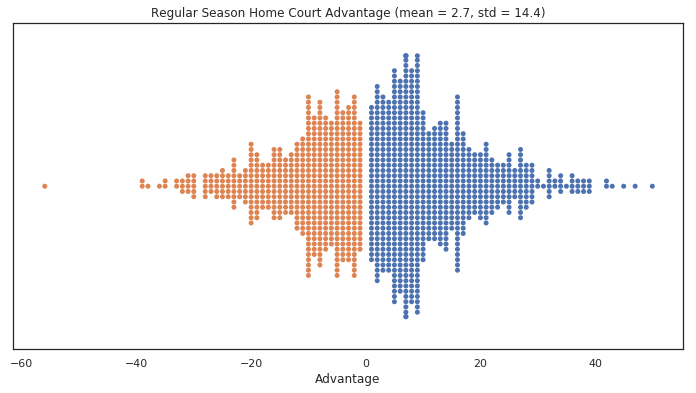

In [4]:
#current pallete
sns.set(style = 'white')
current_pallete = sns.color_palette() #current pallete
#sawrm plot to show all the scores
#accounts for positive half of plot
reg_pos = season.loc[season.advantage > 0]
reg_pos = reg_pos.advantage
#acconuts for negative half of plot
reg_neg = season.loc[season.advantage < 0]
reg_neg = reg_neg.advantage
#plots the data by positive and negative
plt.figure(figsize = (12,6))
ax1 = sns.swarmplot(reg_pos, color = current_pallete[0])
ax2 = sns.swarmplot(reg_neg, color = current_pallete[1])
ax1.set_title('Regular Season Home Court Advantage (mean = 2.7, std = 14.4)')
ax1.set_xlabel('Advantage')

So after our computations the home team on average score 2.7 PPG more, but were these results significant? So we will do a independent t-test because we will assume independence between games but there is some similarity as each team plays 41 games out of the 1230 total games.

    NULL HYPOTHESIS: HOME_PPG = ROAD_PPG
    ALTERNATIVE HYPOTHESIS: HOME_PPG =/= ROAD_PPG

In [5]:
#getting mean of home advatnage
home_mean = np.mean(season.advantage)
#getting home std
home_std = np.std(season.advantage)
#t-test to see if the scores are statistically significant
ttest,pval = ttest_ind(season.scoreHome, season.scoreAway)
print(pval) #so we reject Ho meaning there is a difference in points scored home and road

8.589581531934855e-08


    RESULT: As we can see our p-value is less than <0.05 meaning we reject the null for the alternative so we can 
    conclude that there is a statistically significant difference in points between home teams and away teams.

Now lets look at a players PPG scored home and away. Do players score more at home vs away? In order to test this we will filter our dataset to only include players that shot atleast 3 FGA/game. In this case since we are using the same players and comparing their performance at different points we will assume the games are independent but since it is the same player we will do a paired sample t-test.

    NULL HYPOTHESIS: PLAYER_PPG_HOME = PLAYER_PPG_ROAD
    ALTERNATIVE HYPOTHESIS: PLAYER_PPG_HOME =/= PLAYER_PPG_ROAD

In [6]:
#importing datasets
base_players_home = pd.read_csv('base_players_home.csv')
base_players_road = pd.read_csv('base_players_road.csv')
#advanced allstar players stats
advanced_players_home = pd.read_csv('advanced_players_home.csv')
advanced_players_road = pd.read_csv('advanced_players_road.csv')
#######################################################
#filtering for all players ppg at home
home_ppg = base_players_home.filter(['namePlayer', 'pts', 'fga'], axis = 1)
#filtering for all players ppg at road
road_ppg = base_players_road.filter(['namePlayer', 'pts', 'fga'], axis = 1)
#merging based on playername
all_stats = pd.merge(home_ppg, road_ppg, on = 'namePlayer')
all_stats.query('fga_x >= 3', inplace = True)
all_stats.query('fga_y >= 3', inplace = True)
#hypothesis testing that the difference between the two is 0
ttest, pval = stats.ttest_rel(all_stats.pts_x, all_stats.pts_y)
print(pval) ##so we fail to reject that there is a difference
all_stats.head(10)

0.005180016048348864


,namePlayer,pts_x,fga_x,pts_y,fga_y
0,Aaron Gordon,16.5,13.2,15.5,13.7
1,Aaron Holiday,6.6,5.6,5.2,4.8
2,Abdel Nader,3.9,3.2,4.0,3.9
3,Al Horford,14.3,10.4,12.9,10.8
4,Al-Farouq Aminu,10.2,7.4,8.6,7.3
6,Alec Burks,9.1,7.6,8.5,7.2
7,Alex Abrines,4.4,4.2,6.3,6.0
8,Alex Caruso,6.8,6.6,12.2,7.3
9,Alex Len,10.4,7.8,11.8,9.1
10,Alex Poythress,4.6,3.3,5.4,4.2


    RESULT: Our p-value ends up being 0.005 < 0.05 so from this we reject our null hypothesis in favor of the 
    alternative meaning there is a statistically significant difference between points scored by each player at 
    home and on the road.

Now lets focus only on all star player to see if the best of the best score differently at home and away. As with before we will assume the games are independent but since we are comparing the same players we will use a paired sample t-test.

    NULL HYPOTHESIS: ALLSTAR_PPG_HOME = ALLSTAR_PPG_ROAD
    ALTERNATIVE HYPOTHESIS: ALLSTAR_PPG_HOME =/= ALLSTAR_PPG_ROAD

In [7]:
#list of allstar players
allstars = ['LeBron James', 'James Harden', 'Kevin Durant', 'Kyrie Irving',
            'Kawhi Leonard', 'Damian Lillard', 'Klay Thompson', 'Bradley Beal',
            'Ben Simmons', 'Karl-Anthony Towns', 'LaMarcus Aldridge', 'Dwyane Wade',
            'Anthony Davis', 'Stephen Curry', 'Giannis Antetokounmpo', 'Paul George',
            'Joel Embiid', 'Kemba Walker', 'Khris Middleton', 'Blake Griffin',
            'Russell Westbrook', 'Nikola Jokic', 'Kyle Lowry', 'D\'Angelo Russell', 
            'Nikola Vucevic', 'Dirk Nowitzki']

#filtering only for all star players at home
base_home = base_players_home[base_players_home.namePlayer.isin(allstars)]
#filtering for allstars at road
base_road = base_players_road[base_players_road.namePlayer.isin(allstars)]
#getting home stats of allstars
allstats_home = base_home.filter(['namePlayer', 'pts', 'pctFG', 'minutes', 'plusminus'],
                                 axis = 1)
#getting road stats of allstars
allstats_road = base_road.filter(['namePlayer', 'pts', 'pctFG', 'minutes', 'plusminus'],
                                 axis = 1)
#merging them together
allstars_diff = pd.merge(allstats_home, allstats_road, on = 'namePlayer')
#t-test to see if there is a significant difference
ttest, pval = stats.ttest_rel(allstars_diff.pts_x, allstars_diff.pts_y)
print(pval) ##again we fail to reject that there is a difference

0.15937130017855394


    RESULT: So our p-value > 0.05 meaning we fail to reject our null hypothesis. So that means there is 
    statistically siginificant evidence to conclude that allstar players scores the same at home and away.

Finally, lets look at the clutch statistics of all star players. When the game is on the line do all stars step up to the game or is there a difference?

    NULL HYPOTHESIS: CLUTCH_ALLSTAR_PPG_HOME = CLUTCH_ALLSTAR_PPG_ROAD
    ALTERNATIVE HYPOTHESIS: CLUTCH_ALLSTAR_PPG_HOME =/= CLUTCH_ALLSTAR_PPG_ROAD

In [8]:
###########################IMPORTING DATASETS
#home clutch stats
clutch_home = pd.read_csv('clutch_home.csv')
#road clutch stats
clutch_road = pd.read_csv('clutch_road.csv')
#clutch_allstars
clutch_allstars_home = clutch_home[clutch_home.namePlayer.isin(allstars)]
clutch_allstars_road = clutch_road[clutch_road.namePlayer.isin(allstars)]
#simplifying datset
allstars_home = clutch_allstars_home.filter(['namePlayer', 'pts', 'pctFG', 'minutes', 'plusminus', 'pctFG3', 'pctFT'],
                                 axis = 1)
#getting road stats of allstars
allstars_road = clutch_allstars_road.filter(['namePlayer', 'pts', 'pctFG', 'minutes', 'plusminus', 'pctFG3', 'pctFT'],
                                 axis = 1)
#merging them together
allstars_diff2 = pd.merge(allstars_home, allstars_road, on = 'namePlayer')
#t-test to see if there is a significant difference
ttest, pval = stats.ttest_rel(allstars_diff2.pts_x, allstars_diff2.pts_y)
print(pval) ##again we fail to reject that there is a difference

0.8853104659252108


    RESULT: Now we get a super high p-value of 0.885 > 0.05 so we fail to reject our null meaning there is 
    statistically sginificant evidence to conclude that all stars player do not score less in clutch time in home 
    and away.

## Summarizing our hypothesis tests on home vs away statistics

| Description | Null   | Alternative | p-value | Conclusion |
|-------------|--------|-------------|---------|------------|
| Team scoring | TEAM_PPG_HOME = TEAM_PPG_ROAD | TEAM_PPG_HOME =/= TEAM_PPG_ROAD | 8.589e-08 | Difference |
| Player scoring  | PLAYER_PPG_HOME = PLAYER_PPG_ROAD | PLAYER_PPG_HOME =/= PLAYER_PPG_ROAD | 0.005 | Difference |
| All-star scoring  | ALLSTAR_PPG_HOME = ALLSTAR_PPG_ROAD | ALLSTAR_PPG_HOME =/= ALLSTAR_PPG_ROAD | 0.159 | No Difference |
| All-star clutch scoring | CLUTCH_ALLSTAR_PPG_HOME = CLUTCH_ALLSTAR_PPG_ROAD| CLUTCH_ALLSTAR_PPG_HOME =/= CLUTCH_ALLSTAR_PPG_ROAD | 0.885 | No Difference |

## Examine the 3 different types of shotting percentage for clutch players. 

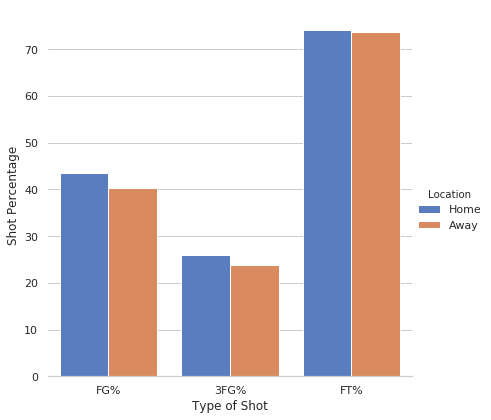

In [9]:
####Principal data manipulation
#look at all players home and away stats
#in the clutch
######grouped barplot 1 graph
####x-axis = freethrows, 2-pt, 3-pt
####y-axis = percentage
###########################IMPORTING DATASETS
#merging for only players that played
#minimum of atleast 3 fg attempted throughout the season
clutch_home = clutch_home.query('fga > 3')
clutch_road = clutch_road.query('fga > 3')
#now we calculate the fg%
clutch_fg_home = np.mean(allstars_home.pctFG)
clutch_fg_road = np.mean(clutch_road.pctFG)
#calcuating 3pt %
clutch_3_home = np.mean(allstars_home.pctFG3)
clutch_3_road = np.mean(clutch_road.pctFG3)
#calculating ft %
clutch_ft_home = np.mean(allstars_home.pctFT)
clutch_ft_road = np.mean(clutch_road.pctFT)
#creating a dict of all our stats
d = {'Location': ['Home', 'Away','Home', 'Away', 'Home', 'Away'],
     'Type of Shot': ['FG%', 'FG%', '3FG%','3FG%', 'FT%', 'FT%'],
     'Shot Percentage': [np.mean(allstars_home.pctFG), np.mean(allstars_road.pctFG),
                    np.mean(allstars_home.pctFG3), np.mean(allstars_road.pctFG3),
                    np.mean(allstars_home.pctFT), np.mean(allstars_road.pctFT)]}
#saving into a dataframe
df = pd.DataFrame(data = d)
df['Shot Percentage'] = df['Shot Percentage'].apply(lambda x:x*100)
#setting style
sns.set(style = "whitegrid")
#plotting our grouped bargraph
test = sns.catplot(x = "Type of Shot", y = "Shot Percentage", hue = "Location", data = df,
                   height = 6, kind = "bar", palette = "muted")
sns.despine(left = True)

By looking at the grouped bar graph above, we can tell that regardless of the type of shots, field goal, e point field goal, free throws, the shotting percentage for all three types of shots all had a higher percentage at home. The field goal percentage had the biggest difference between home and away and the free throw percentage has the least amount of difference between home and away. 

## Examining All Stars Home vs Road TS%

In [10]:
####Principal data manipulation
#look at all the shots taken in the last 5 minutes of the game
#subset to players with atleast 15 shots.
#and get each players TS% of top 30 clutch
##horrizontal bar chart
#True shooting percentage is  True Shooting Percentage; the formula is PTS / (2 * TSA). 
#True shooting percentage is a measure of shooting efficiency that takes into account field goals, 
#3-point field goals, and free throws.
#TSA - True Shooting Attempts; the formula is FGA + 0.44 * FTA.
#selecting all stars
clutch_home_adv = clutch_home_adv[clutch_home_adv.namePlayer.isin(allstars)]
clutch_road_adv = clutch_road_adv[clutch_road_adv.namePlayer.isin(allstars)]
clutch_all_adv = clutch_all_adv[clutch_all_adv.namePlayer.isin(allstars)]

#selecting only names and pctTS and fga
clutch_home_adv = clutch_home_adv.filter(items = ['namePlayer', 'fga', 'pctTS'])
clutch_road_adv = clutch_road_adv.filter(items = ['namePlayer', 'fga', 'pctTS'])
clutch_all_adv = clutch_all_adv.filter(items = ['namePlayer', 'fga', 'pctTS'])
#must have shot atleast 30 FGs
#clutch_all_adv = clutch_all_adv.query('fga >= 30')
#sorting by highest %
clutch_all_adv = clutch_all_adv.sort_values('pctTS', ascending = True)
#removing dirk since he never played in clutch
clutch_all_adv.drop(clutch_all_adv.index[0], inplace = True, axis = 0)
#getting the names of players
clutch_test = clutch_all_adv.namePlayer
#clutch10 = clutch_all_adv.namePlayer[:10]
#resetting index
#clutch10.reset_index(inplace = True, drop = True)
#now getting home and away stats
#clutch_home_adv = clutch_home_adv[clutch_home_adv.namePlayer.isin(clutch10)]
#clutch_road_adv = clutch_road_adv[clutch_road_adv.namePlayer.isin(clutch10)]
#restting index
clutch_home_adv.reset_index(inplace = True, drop = True)
clutch_road_adv.reset_index(inplace = True, drop = True)
#adding new column to be used as color scheme for plot
clutch_home_adv['Location'] = 'Home'
clutch_road_adv['Location'] = 'Road'
#concating dataframes home and away
clutch = pd.concat([clutch_home_adv, clutch_road_adv])
#ordering for clarity
clutch['sort'] = pd.Categorical(clutch['namePlayer'], categories = clutch_test, ordered = True)
clutch.sort_values('sort', inplace = True)
clutch.reset_index(inplace = True)
#multiplying by 100
clutch.pctTS = clutch.pctTS.apply(lambda x: x*100)

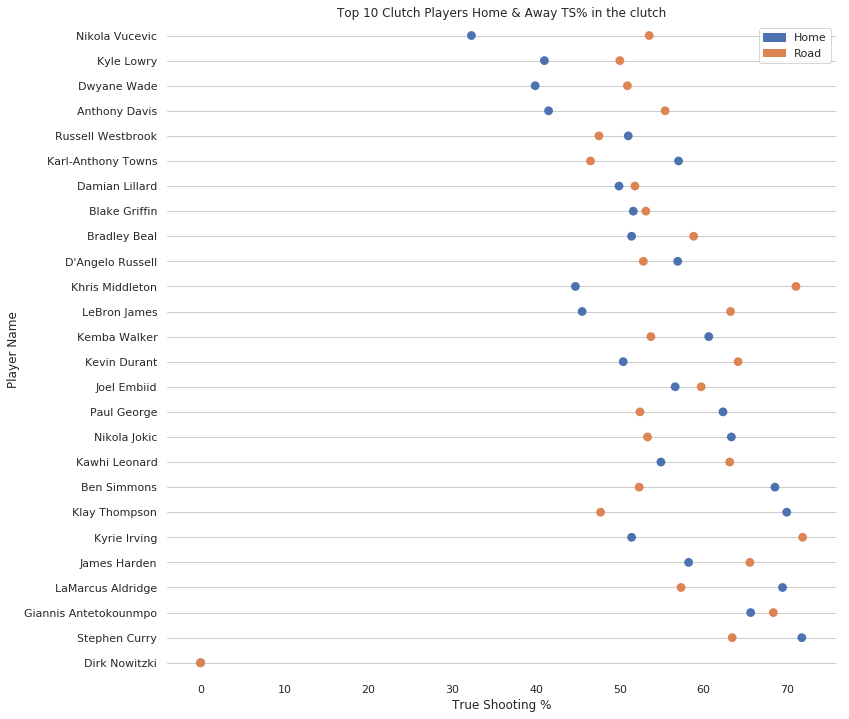

In [11]:
#plotting our info of top 10 clutch players home vs away FG
sns.set(style = 'whitegrid')
#ax = sns.scatterplot(x = 'pctTS', y = 'namePlayer', data = clutch,
#                     hue = 'Location', size = 'fga')
plt.figure(figsize=(12,12))
ax = sns.pointplot(x = 'pctTS', y = 'namePlayer', data = clutch,
                     hue = 'Location', size = 'fga', join = False)

#adding a custom legend
current_pallete = sns.color_palette() #current pallete
blue_patch = mpatches.Patch(color = current_pallete[0], label = 'Home')
orange_patch = mpatches.Patch(color = current_pallete[1], label = 'Road')
plt.legend(handles = [blue_patch, orange_patch])
#adding our labels
plt.xlabel('True Shooting %')
plt.ylabel('Player Name')
plt.title('Top 10 Clutch Players Home & Away TS% in the clutch')
#cleaning up plot
sns.despine(left = True, bottom = True)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False)

In the graph above, we have plotted the Top 10 all-star clutch players' true shooting percentage both home and away. By looking at the individual players, some players have a big difference between their away TS% and their home TS% and some have a very close difference between the two TS%. There is an even spread among the top 10 all-star clutch players on whether they had a higher TS% at home or away. 

In [12]:
#allstars and difference in TS% home and away
df = pd.merge(clutch_home_adv, clutch_road_adv, on = 'namePlayer')
#dropping uneeded columns for df clarity
df.drop(['fga_x', 'Location_x', 'fga_y', 'Location_y'], axis=1, inplace=True)
df.pctTS_x = df.pctTS_x.apply(lambda x: x*100)
df.pctTS_y = df.pctTS_y.apply(lambda x: x*100)
#calculating difference
df['difference'] = df.pctTS_x - df.pctTS_y
df

,namePlayer,pctTS_x,pctTS_y,difference
0,Anthony Davis,55.4,41.5,13.9
1,Ben Simmons,52.3,68.5,-16.2
2,Blake Griffin,53.1,51.6,1.5
3,Bradley Beal,58.8,51.4,7.4
4,D'Angelo Russell,52.8,56.9,-4.1
5,Damian Lillard,51.8,49.9,1.9
6,Dirk Nowitzki,0.0,0.0,0.0
7,Dwyane Wade,50.9,39.9,11.0
8,Giannis Antetokounmpo,68.3,65.6,2.7
9,James Harden,65.5,58.2,7.3


In the table above, we have all 26 all star players and we have their TS% divided into home and away. The last column shows the difference between their home and away TS%. If the number in the difference column is negative, that means the player had a higher TS% at home. 

## Worst 5 All-Star Clutch Player 

Now lets look at the top 5 worse clutch all stars. Can we figure out why someone is shooting worse in the clutch? Maybe a player has jitters and he is terrible at FTs so his TS% plummets? Lets find out.

In [13]:
####Principal data manipulation
#top 5 clutch players and their shot charts home/away
###2-pt, 3-pt, ft%
#side ways dot graph like you saw on reddit
#to seprate dots, blue = home, red = away
#1 for free throw
#1 for 2-pt
#1 for 3-pt
#####3 TOTAL SIDEWAYS DOT GRAPHS
#selecting only names and pctTS and fga
clutch_home = clutch_home.filter(items = ['namePlayer', 'fg2a', 'pctFG2', 'fg3a', 'pctFG3', 'fta', 'pctFT'])
clutch_road = clutch_road.filter(items = ['namePlayer', 'fg2a', 'pctFG2', 'fg3a', 'pctFG3', 'fta', 'pctFT'])
clutch_all = clutch_all.filter(items = ['namePlayer', 'fg2a', 'pctFG2', 'fg3a', 'pctFG3', 'fta', 'pctFT'])
clutch5 = clutch_all_adv.namePlayer[:5]
#resetting index
clutch5.reset_index(inplace = True, drop = True)
#now getting home and away stats
clutch_home = clutch_home[clutch_home.namePlayer.isin(clutch5)]
clutch_road = clutch_road[clutch_road.namePlayer.isin(clutch5)]
#restting index
clutch_home.reset_index(inplace = True, drop = True)
clutch_road.reset_index(inplace = True, drop = True)
#adding new column to be used as color scheme for plot
clutch_home['Location'] = 'Home'
clutch_road['Location'] = 'Road'
#concating dataframes home and away
clutch = pd.concat([clutch_home, clutch_road])
#ordering for clarity
clutch['sort'] = pd.Categorical(clutch['namePlayer'], categories = clutch5, ordered = True)
clutch.sort_values('sort', inplace = True)
clutch.reset_index(inplace = True)
#multiplying by 100
clutch.pctFG2 = clutch.pctFG2.apply(lambda x: x*100)
clutch.pctFG3 = clutch.pctFG3.apply(lambda x: x*100)
clutch.pctFT = clutch.pctFT.apply(lambda x: x*100)

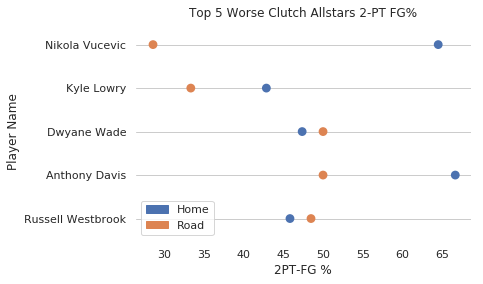

In [14]:
####################plotting 2-PT FG%
ax = sns.pointplot(x = 'pctFG2', y = 'namePlayer', data = clutch,
                   hue = 'Location', size = 'fg2a', join = False)

#adding a custom legend
plt.legend(handles = [blue_patch, orange_patch])
#adding our labels
plt.xlabel('2PT-FG %')
plt.ylabel('Player Name')
plt.title('Top 5 Worse Clutch Allstars 2-PT FG%')
#cleaning up plot
sns.despine(left = True, bottom = True)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False)

By looking at the graph above, it shows the 2 pt field goal percentage for the top 5 worse clutch players. 3 out of the 5 players that are graphed had a higher percentage at home and the other 2 players that are graphed had a higher percentage at away but the difference between the away percentage and the home percentage is less than 5 percent. 

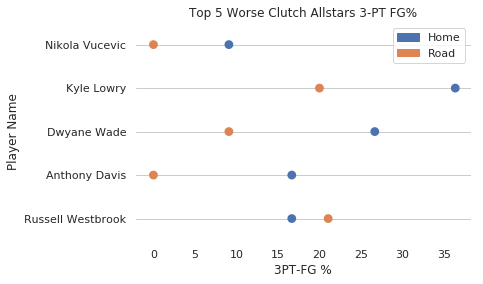

In [15]:
####################plotting 3-PT FG%
ax = sns.pointplot(x = 'pctFG3', y = 'namePlayer', data = clutch,
                   hue = 'Location', size = 'fg3a', join = False)

#adding a custom legend
plt.legend(handles = [blue_patch, orange_patch])
#adding our labels
plt.xlabel('3PT-FG %')
plt.ylabel('Player Name')
plt.title('Top 5 Worse Clutch Allstars 3-PT FG%')
#cleaning up plot
sns.despine(left = True, bottom = True)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False)

The graph above shows the 3 point field goal percentage for the top 5 worse all-star clutch players. 4 out of the 5 had a higher percentage at home than away and Russell Westbrook is the only one that had a higher percentage at away games. Even though Westbrook had a higher percentage at away games, the difference between his away and home percentage is less than around 5%. 

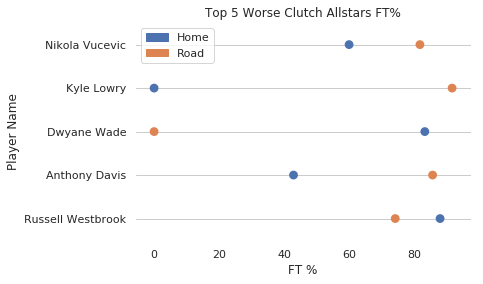

In [16]:
####################plotting FT%
ax = sns.pointplot(x = 'pctFT', y = 'namePlayer', data = clutch,
                   hue = 'Location', size = 'fta', join = False)

#adding a custom legend
plt.legend(handles = [blue_patch, orange_patch])
#adding our labels
plt.xlabel('FT %')
plt.ylabel('Player Name')
plt.title('Top 5 Worse Clutch Allstars FT%')
#cleaning up plot
sns.despine(left = True, bottom = True)
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False)

One of the things that we expected to see was players performing worse at the FT line rather than shooting on the court. But instead we can see that many of the players actually shoot freethrows better on the road. (Lowry & Wade and no FTs attempted at home) So really we can conclude that what makes or breaks a players clutch shooting is their ability to score points live.

# Top 5 All-Star Shooting Styles Home vs Road

So now we will look at the top 5 all-stars shot charts home and away to see if someone favors different spots on the floor. Maybe a player performs shooting 3s at home from the right side but he shoots more 2s on the road. This way we can get an insight on how to guard a particular player especially the best of the best.

In [17]:
#top 5 players shots
steph = shotcharts[shotcharts.namePlayer == 'Stephen Curry']
giannis = shotcharts[shotcharts.namePlayer == 'Giannis Antetokounmpo']
LMA = shotcharts[shotcharts.namePlayer == 'LaMarcus Aldridge']
james = shotcharts[shotcharts.namePlayer == 'James Harden']
kyrie = shotcharts[shotcharts.namePlayer == 'Kyrie Irving']

In [18]:
#function to get game ids and store into a list
def ids():
    teams = ['GSW', 'MIL', 'SAS', 'HOU', 'BOS']
    home = []
    road = []
    home_id = []
    road_id = []
    for i in teams:
        home.append(season[season.slugTeamHome == i])
        road.append(season[season.slugTeamAway == i])
    for j in range(5):
        home_id.append(home[j].idGame)
        road_id.append(road[j].idGame)
    return home_id, road_id
#running our function
home_id, road_id = ids()

In [19]:
###Getting our top-5 players home and away shots
#oladipo home & away
steph_home = shotcharts[(shotcharts.idGame.isin(home_id[0])) & (shotcharts.namePlayer == 'Stephen Curry') &
                      (shotcharts.numberPeriod == 4)]
steph_road = shotcharts[(shotcharts.idGame.isin(road_id[0])) & (shotcharts.namePlayer == 'Stephen Curry') &
                      (shotcharts.numberPeriod == 4)]
#horford home & away
giannis_home = shotcharts[(shotcharts.idGame.isin(home_id[1])) & (shotcharts.namePlayer == 'Giannis Antetokounmpo') &
                     (shotcharts.numberPeriod == 4)]
giannis_road = shotcharts[(shotcharts.idGame.isin(road_id[1])) & (shotcharts.namePlayer == 'Giannis Antetokounmpo') &
                     (shotcharts.numberPeriod == 4)]
#bullock home & away
LMA_home = shotcharts[(shotcharts.idGame.isin(home_id[2])) & (shotcharts.namePlayer == 'LaMarcus Aldridge') &
                      (shotcharts.numberPeriod == 4)]
LMA_road = shotcharts[(shotcharts.idGame.isin(road_id[2])) & (shotcharts.namePlayer == 'LaMarcus Aldridge') &
                      (shotcharts.numberPeriod == 4)]
#jh home and away
james_home = shotcharts[(shotcharts.idGame.isin(home_id[3])) & (shotcharts.namePlayer == 'James Harden') &
                       (shotcharts.numberPeriod == 4)]
james_road = shotcharts[(shotcharts.idGame.isin(road_id[3])) & (shotcharts.namePlayer == 'James Harden') &
                       (shotcharts.numberPeriod == 4)]
#steph home & away
kyrie_home = shotcharts[(shotcharts.idGame.isin(home_id[4])) & (shotcharts.namePlayer == 'Kyrie Irving') &
                        (shotcharts.numberPeriod == 4)]
kyrie_road = shotcharts[(shotcharts.idGame.isin(road_id[4])) & (shotcharts.namePlayer == 'Kyrie Irving') &
                        (shotcharts.numberPeriod == 4)]

In [20]:
#top 5 home and road in 2 lists and their pics 
top5_home = [steph_home, giannis_home, LMA_home, james_home, kyrie_home]
top5_road = [steph_road, giannis_road, LMA_road, james_road, kyrie_road]
top5_pics = ['steph_pic.png', 'giannis.png', 'LMA.png', 'james.png', 'kyrie.png']

In [21]:
###Function to plot the shot charts
def shot_charts(a, b):
    cmap=plt.cm.gist_heat_r
    for i,j in zip(a, b):
        sns.set(style = "white")
        #plt size and plogging
        plt.figure(figsize = (12,12))
        test = sns.jointplot(i.locationX, i.locationY, stat_func=None,
                                 kind='hex', space = 0, color=cmap(0.2),
                                 cmap=cmap, gridsize = 15)
        ax = test.ax_joint
        draw_court(ax)
        #ax = draw_court(plots.ax_joint)
        ax.set_xlim(-250, 250) #x-limits
        ax.set_ylim(422.5, -47.5) #y-limits
        #removing ticks from the graph
        ax.tick_params(axis = 'both', top = False, right = False, bottom = False, left = False)
        ax.tick_params(labelbottom= False, labelleft= False)
        #setting tickets and labels as empty
        plt.xticks([])
        plt.yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        #uploading player pic on the top right
        img = plt.imread(j)
        img = OffsetImage(img, zoom = 0.5)
        img.set_offset((300,315))
        ax.add_artist(img)

<Figure size 864x864 with 0 Axes>

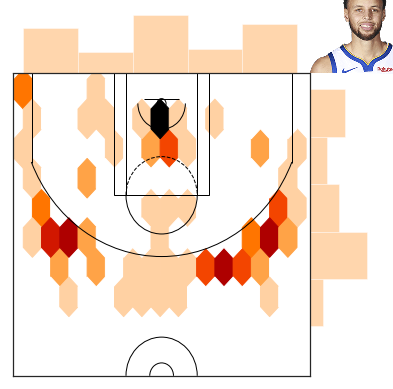

<Figure size 864x864 with 0 Axes>

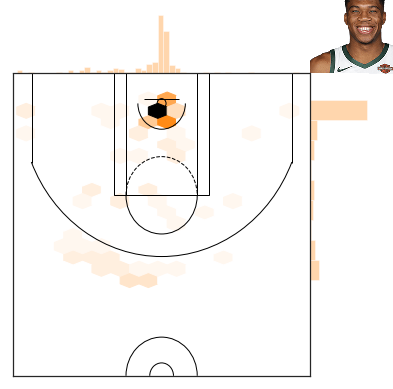

<Figure size 864x864 with 0 Axes>

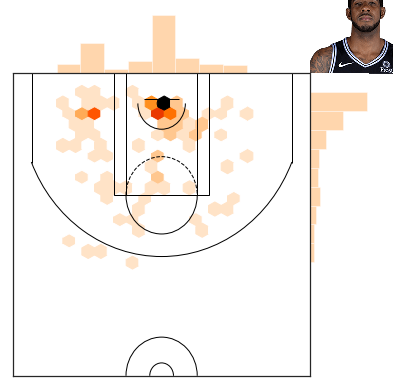

<Figure size 864x864 with 0 Axes>

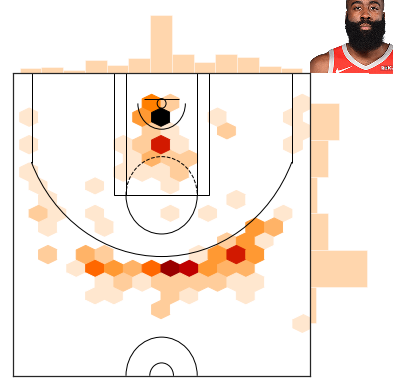

<Figure size 864x864 with 0 Axes>

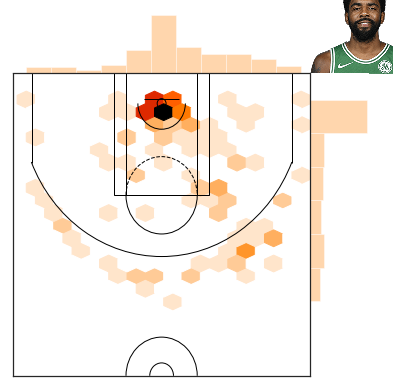

In [22]:
#shotcharts for the 6 players,
shot_charts(top5_home, top5_pics)

<Figure size 864x864 with 0 Axes>

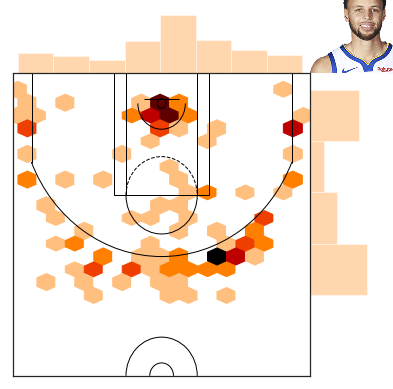

<Figure size 864x864 with 0 Axes>

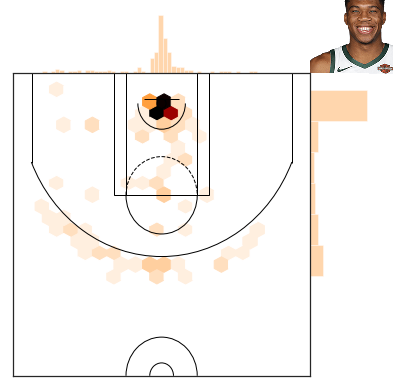

<Figure size 864x864 with 0 Axes>

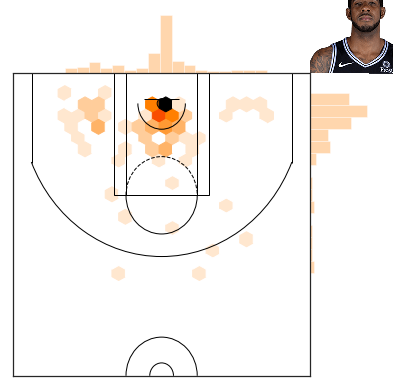

<Figure size 864x864 with 0 Axes>

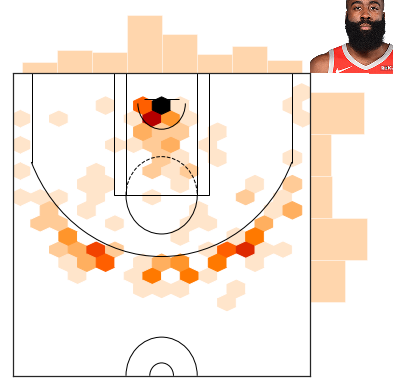

<Figure size 864x864 with 0 Axes>

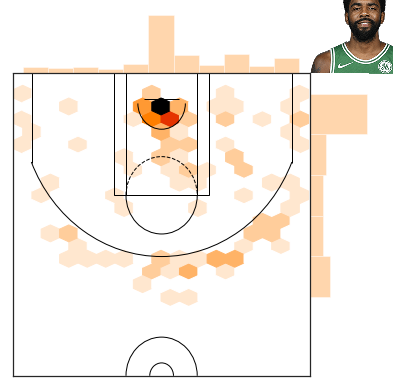

In [23]:
shot_charts(top5_road, top5_pics)

We can examine the top 5 players home and away shot charts. Steph Curry and Giannis Antetokounmpo's shot charts both home and away are very similar. This means the two players didn't shoot drastically different when they are away and when they are at home. LaMarcus Aldridge had a wider range of shoots at his home games than his away games. During his away games he stayed closer to the rim, but at his home games, he is more likely to shoot further jump shots. James Harden and Kyrie Irving also had similar home and away shot charts. It is interesting to look at players shot charts because one can tell if their play is drastically different. 

## Understanding the NBA Finals Teams Shooting Styles

One thing that is incredibly important when game planning for a team is the opponents style of play. Depending on how teams plays players and coaches need to make adjustments in order to be able to captalize on an opponents weaknesses while playing to their own strengths. So lets examine the two teams in the NBA Finals right now: Warriors & Raptors. Can we figure out their style of play by looking at their shots?

In [24]:
#shot charts for warriors
warriors_shots = shotcharts[shotcharts.nameTeam == 'Golden State Warriors']
#shot charts for raptors
raptors_shots = shotcharts[shotcharts.nameTeam == 'Toronto Raptors']
warriors_shot_counts = warriors_shots.typeAction.value_counts()
#getting all the counts for each shot type
raptors_shot_counts = raptors_shots.typeAction.value_counts()
#merging the two shot types together
df = pd.concat([warriors_shot_counts, raptors_shot_counts], axis = 1, sort = False)
df.columns = ['Warriors Shot Types', 'Raptors Shot Types']
df.head(10)

,Warriors Shot Types,Raptors Shot Types
Jump Shot,2901.0,2668
Pullup Jump shot,917.0,730
Layup Shot,407.0,270
Step Back Jump shot,333.0,161
Driving Layup Shot,302.0,654
Fadeaway Jump Shot,249.0,105
Cutting Layup Shot,198.0,159
Cutting Dunk Shot,168.0,89
Turnaround Fadeaway shot,162.0,135
Running Layup Shot,144.0,188


From above, we see the warriors top shots involve more shooting where as raptors top shots involve more driving and layups. So what if we use NNMF to decifer the shooting styles of the two teams?

In [25]:
#############################
#Below is my version of using NNMF to decompose warriors and raptors shots into 5 categories
#The code is borrowed from Homework 2.
#I changed around some functions to get what I needed and the altered functions are all in homework2.py

#############################
import numpy as np
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)
#saving into a tuple
bin_edges = (xedges, yedges)

In [26]:
#############################
###This first part goes through our entire shotcharts data and groups by team
###We do this so we can see the teams shot chart, vectorized shot charts and then residuals
#############################

## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1
## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []
## 2d histogram containers for binned counts and smoothed binned counts
## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(shotcharts.groupby('nameTeam')):
    ## what does this line do?
    pid, pdf = one 
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]
X_5 = np.vstack(all_smooth).T
#all teams matrix comp
W_5, H_5 = non_negative_marix_decomp(5, X_5)
#x_hat for all teams
X5_hat = W_5 @ H_5
##Now we can plot them

0.00023099095594708748


Text(0.5, 1.0, 'Warriors Residual Shooting Pattern (r=5)')

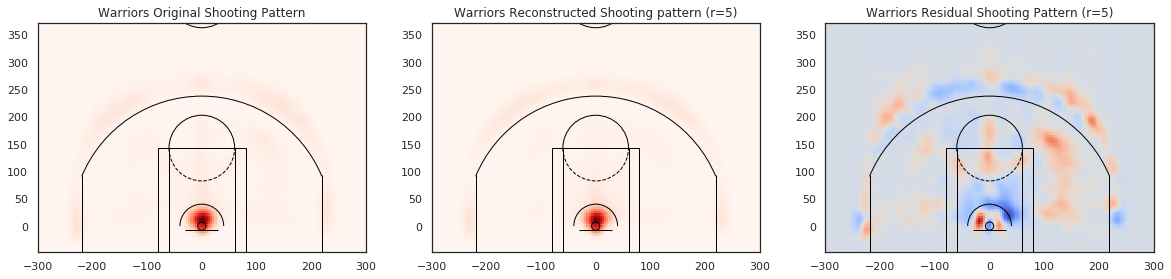

In [27]:
#warriors shot charts
to_plot_idx = pids.index('Golden State Warriors')
fig, ax = plt.subplots(1, 3, figsize=(20,60))
## Call plot_vectorized_shot_chart
original_shotchart = plot_vectorized_shotchart(X_5[:, to_plot_idx], xedges, yedges, ax = ax[0])
reconstructed_shotchart = plot_vectorized_shotchart(X5_hat[:, to_plot_idx], xedges, yedges, ax = ax[1])
residual_chart = plot_vectorized_shotchart(X_5[:, to_plot_idx] - X5_hat[:, to_plot_idx], xedges, yedges, ax = ax[2],
                                          cmap = 'coolwarm')
#naming our plots
print(max(abs(X5_hat[:, to_plot_idx] - X_5[:, to_plot_idx])))
ax[0].set_title('Warriors Original Shooting Pattern')
ax[1].set_title('Warriors Reconstructed Shooting pattern (r=5)')
ax[2].set_title('Warriors Residual Shooting Pattern (r=5)')

0.0003231568430124954


Text(0.5, 1.0, 'Raptors Residual Shooting Pattern (r=5)')

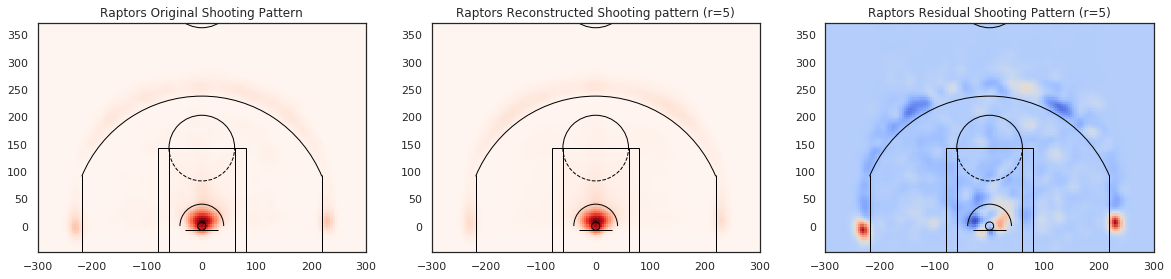

In [28]:
#raptors shot charts
to_plot_idx = pids.index('Toronto Raptors')
fig, ax = plt.subplots(1, 3, figsize=(20,60))
## Call plot_vectorized_shot_chart
original_shotchart2 = plot_vectorized_shotchart(X_5[:, to_plot_idx], xedges, yedges, ax = ax[0])
reconstructed_shotchart2 = plot_vectorized_shotchart(X5_hat[:, to_plot_idx], xedges, yedges, ax = ax[1])
residual_chart2 = plot_vectorized_shotchart(X_5[:, to_plot_idx] - X5_hat[:, to_plot_idx], xedges, yedges, ax = ax[2],
                                          cmap = 'coolwarm')
#naming our plots
print(max(abs(X5_hat[:, to_plot_idx] - X_5[:, to_plot_idx])))
ax[0].set_title('Raptors Original Shooting Pattern')
ax[1].set_title('Raptors Reconstructed Shooting pattern (r=5)')
ax[2].set_title('Raptors Residual Shooting Pattern (r=5)')

As we saw from the table earlier the two teams do shoot different styles of shots. In particular when we look at the residuals of the two teams shot charts we can tell where they predominantly don't take their shots. The warriors shoot plenty of midrange jumpers as highlighted by the red spots in the 3rd column graph, but if you compare that to the Raptors we see a severge lack of red in the midrange. Now this doesn't necessarily mean they don't shoot any but this does allow us to see the different styles of play of the two teams. Now we can break these graphs down into the 5 shot basis to see just what type of shots the warriors mainly shoot and from where.

## Breaking team shot styles into different basis

In [29]:
#############################
###Now we will vectorize our data to show our 5 basis for the 2 teams in the NBA Finals
###The Warriors and Raptors so we will only take each respective teams shots
#For some reason jupyter was messing up this part if I turned it into a function so I just bruteforced it for each team type
#the function I created for this is get_bins in homework2 but if you try running it jupyter would not recognize it
#the function worked perfectly fine when I created it in anaconda/spyder.
#############################

## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1
## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []
## 2d histogram containers for binned counts and smoothed binned counts
## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(warriors_shots.groupby('namePlayer')):
    ## what does this line do?
    pid, pdf = one 
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]
X = np.vstack(all_smooth).T

###This part gets all raptors players shots and vectorizes their data
## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1
## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids_2 = []
## 2d histogram containers for binned counts and smoothed binned counts
## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(raptors_shots.groupby('namePlayer')):
    ## what does this line do?
    pid_2, pdf = one 
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids_2 += [pid_2]
X2 = np.vstack(all_smooth).T

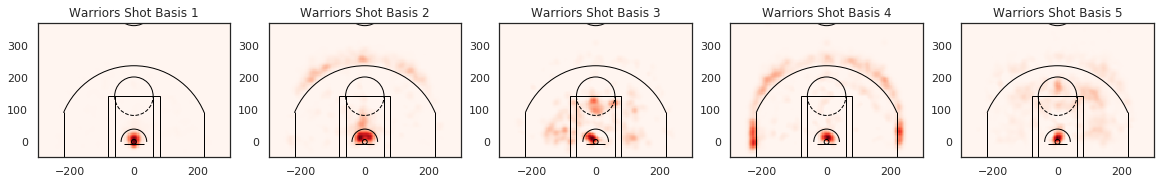

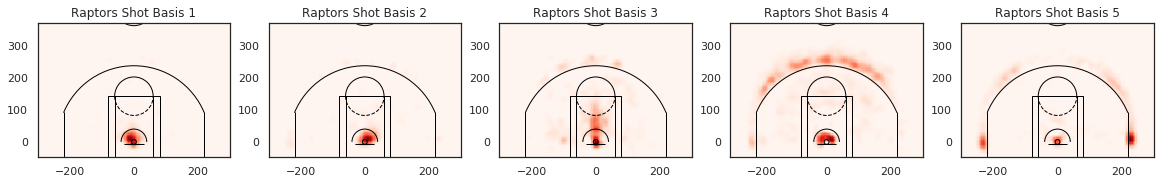

In [30]:
#################################################### WARRIORS BASIS
#using our NNMF function from sklearn to decompose in to 5 different shot types
W5, H5 = non_negative_marix_decomp(5, X)
#get x_hat by multiplying W and H
X5_hat = W5 @ H5
#printing out our 5 charts
fig, ax = plt.subplots(1, 5, figsize=(20, 15))
## Write a for loop
for i in range(5):
    plot_vectorized_shotchart(W5[:,i], xedges, yedges, ax = ax[i])
    ax[i].set_title('Warriors Shot Basis %i' % (i+1))
#################################################### RAPTORS BASIS
#using our NNMF function from sklearn to decompose in to 5 different shot types
W5_2, H5_2 = non_negative_marix_decomp(5, X2)
#get x_hat by multiplying W and H
X5_hat_2 = W5 @ H5
#printing out our 5 charts
fig, ax = plt.subplots(1, 5, figsize=(20, 15))
## Write a for loop
for i in range(5):
    plot_vectorized_shotchart(W5_2[:,i], xedges, yedges, ax = ax[i])
    ax[i].set_title('Raptors Shot Basis %i' % (i+1))

As we can see the top charts refers to the warrior players shot styles and the bottom the raptors. From this we can clearly see what we found from the simple chart up top. The warriors shoot many shots at the 3 point line and frequently shoot short 2s but the raptors predominantly shoot layups right in front of the hoop and 3s.

# Clustering Clutch Players

So now that we know what all stars are the best and worse clutch players, can we use clustering methods to decipher and paticular patterns in our data and to furthur predict new players clutch ability. Here we will try 2 methos of clustering: K-Means and Gaussian Mixture Models. In order to begin we will need to choose the number of clusters we want as that isn't just randomly decisited so we will check the variance as our number of clusters increases. Specifically we will look at clutch players ortg and drtg to categorize players into difference categories. One thing we know is that the average offfensive and defensive ratings between teams was 110.4 each.

Text(0.5, 1.0, 'Clusters vs Variance for k-means')

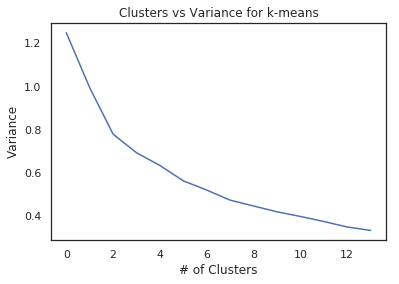

In [31]:
#importing clusters
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_score
from scipy import cluster
from sklearn.mixture import GaussianMixture

#k-means clusting for classifying clutch players.
clutch_all = pd.read_csv('clutch_all_adv.csv')
#subsetting for players that shot more than 30 fga
clutch_all = clutch_all.query('fga >= 30')
#filtering for players and TS%
clutch_all = clutch_all.filter(items = ['namePlayer','ortg', 'drtg'])
#setting index
clutch_all.set_index('namePlayer', inplace = True)
#whitening data
white = cluster.vq.whiten(clutch_all)
#checking for variance
initial = [cluster.vq.kmeans(white,i) for i in range(1,15)]
plt.plot([var for (cent,var) in initial])
#plot labels
plt.xlabel('# of Clusters')
plt.ylabel('Variance')
plt.title('Clusters vs Variance for k-means')

Looks like we n = 5 is the loudest drop in variance so we will take 5 clusters.

Text(0.5, 1.0, '5 Clusters K-Means Clustering')

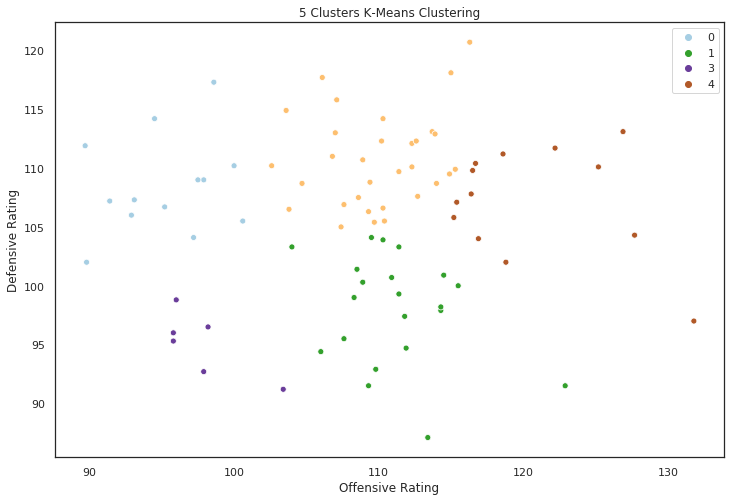

In [32]:
#starting kmeans with 5 clusters
kmeans = KMeans(5, random_state = 0).fit(clutch_all)
#getting predictions
y_kmeans = kmeans.predict(clutch_all)
plt.figure(figsize = (12,8))
#plotting our clusters based on k-means
ax = sns.scatterplot(clutch_all.ortg, clutch_all.drtg, hue = y_kmeans, palette = "Paired")
#labels
ax.set_xlabel('Offensive Rating')
ax.set_ylabel('Defensive Rating')
ax.set_title('5 Clusters K-Means Clustering')

As we can see, we come out with 5 distinct clusters and each can be described as different players:

    0 = Players that are bad defensively and offensively
    1 = Players that are great defensively but average offensively
    2 = Players that are poor defensively but average offensively
    3 = Players that are great defensively but bad offensively
    4 = Players that are average defensively but great offensively

One of the limits of k-means clustering is the fact that our clusters are curcular. Alot of the times our clusters don't completely follow a perfect circle so it can be hard to distinguish players in a cluttered dataset. Particularly in our case there aren't clear and distinguished clusters so a better way to go about cluster will be to use a Gaussian Mixture Model (GMM).

# Gaussian Mixture Modeling

Gaussian Mixture Modeling allows us to get more accurate style clusters because instead of classifying a point we get a probably for each point. This probability allows us to get a better estimate of seperate clusters. For example, say there is a point that is in between Cluster 1 & Cluster 2. In K-means clustering we would not get an underlying probability of the point being in either of the clusters but rather rely on the distance between the center. In Gaussian Mixture Models we get a probability of a point being in each cluster so we have a more accurate representation of the data. Now just like previously we have to find the number of clusters we wish to work with, so we will begin with generating silhouette scores that will allow us to see how good our cluster is. To keep things short, a score of 1 means our clustering is perfect where as -1 means it is terrible. So we will use these scores to determine the best number of clusters.

In [33]:
from sklearn.metrics import silhouette_score
#list to hold silhouette scores
silhouette_gmm = []
#we will look from 2 to 20 clusters
for n_clusters in range(2, 10):
    gmm = GaussianMixture(n_components=5).fit(clutch_all)
    #get labels
    labels = gmm.predict(clutch_all)
    #insert score into list
    silhouette_gmm.append(silhouette_score(clutch_all, labels))
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_gmm[n_clusters - 2])

For n_clusters = 2 The average silhouette_score is : 0.3206697531800551
For n_clusters = 3 The average silhouette_score is : 0.3982427302838172
For n_clusters = 4 The average silhouette_score is : 0.3255824653013655
For n_clusters = 5 The average silhouette_score is : 0.332087286364278
For n_clusters = 6 The average silhouette_score is : 0.31371581325496034
For n_clusters = 7 The average silhouette_score is : 0.3052872430104354
For n_clusters = 8 The average silhouette_score is : 0.3071726771947533
For n_clusters = 9 The average silhouette_score is : 0.3255824653013655


In [34]:
#We calculate the improvement between scores.
silhouette_diff = []
for i in range(1, len(silhouette_gmm)):
    improvement = 1 - ((1 - silhouette_gmm[i]) / (1 - silhouette_gmm[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = 0.1141903771647057
For n_cluster = 4, percent improvement = -0.12074680047774367
For n_cluster = 5, percent improvement = 0.009645094808840016
For n_cluster = 6, percent improvement = -0.02750579938704001
For n_cluster = 7, percent improvement = -0.012281457750761504
For n_cluster = 8, percent improvement = 0.002713976626092407
For n_cluster = 9, percent improvement = 0.026571971832853314


As we can clearly see from the above, our highes silhouette score was for 6 slusters and that was also the moment of the highest improvement. Meaning when we went from 5 clusters to 6 we got the highest jump in silhouette scores. So for our purposes we will use 6 clusters to identify different types of clutch players.

Text(0.5, 1.0, '5 Clusters K-Means Clustering')

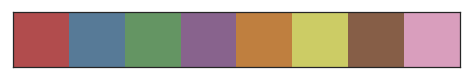

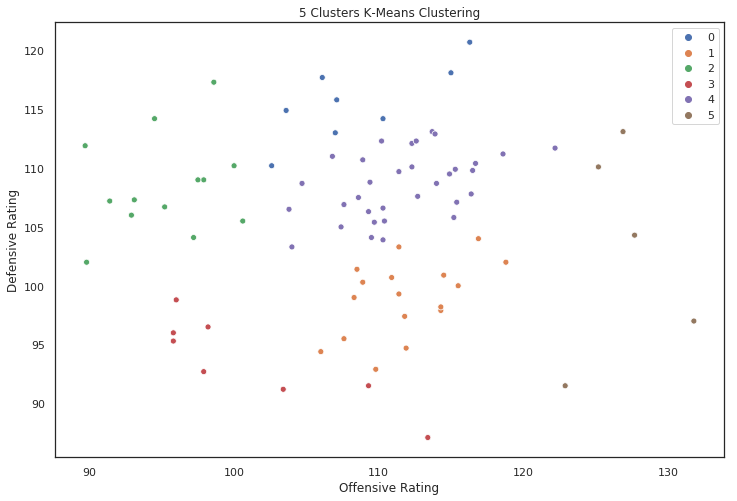

In [35]:
#plot pallete
current = sns.color_palette(sns.palplot(sns.color_palette("Set1", n_colors=8, desat=.5)))
#gmm using 6 components
gmm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state = 2).fit(clutch_all)
#labeling our points based on GMM
labels = gmm.predict(clutch_all)
#changing fig size
plt.figure(figsize = (12,8))
#plotting our GMM clusters
ax = sns.scatterplot(clutch_all.ortg, clutch_all.drtg, hue = labels, palette = current[0:6], legend = 'full')
#labels
ax.set_xlabel('Offensive Rating')
ax.set_ylabel('Defensive Rating')
ax.set_title('5 Clusters K-Means Clustering')

Now that we have our clusters lets plot our clusters for more clarity to see how much things overlapped.

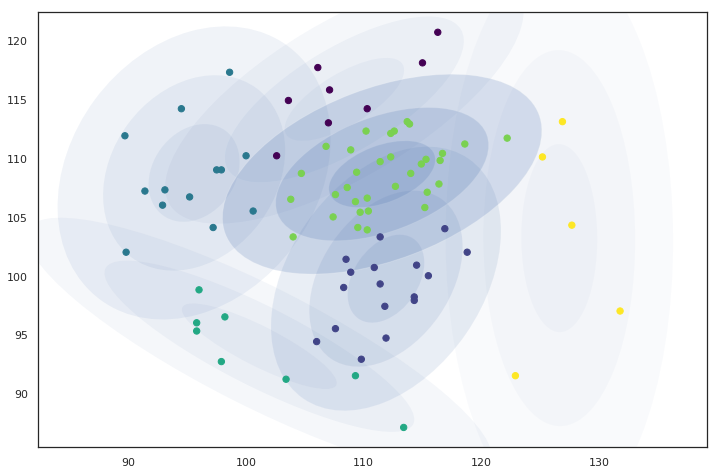

In [36]:
###Functions influenced by book Python for Data Science for plotting elipses of our clusters
#draws elipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
#plotting gmm
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.ortg, X.drtg, c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
#changing fig size
plt.figure(figsize = (12,8))
#plotting our GMM clusters with elipses
plot_gmm(gmm, clutch_all)

As we can see there is a good amount of overlap between clusters and a good majority of observations lie inbetween two ellipses. So picking a GMM model seems to be a much more appropriate fit considering the our data.

Text(0.5, 1.0, '5 Clusters K-Means Clustering')

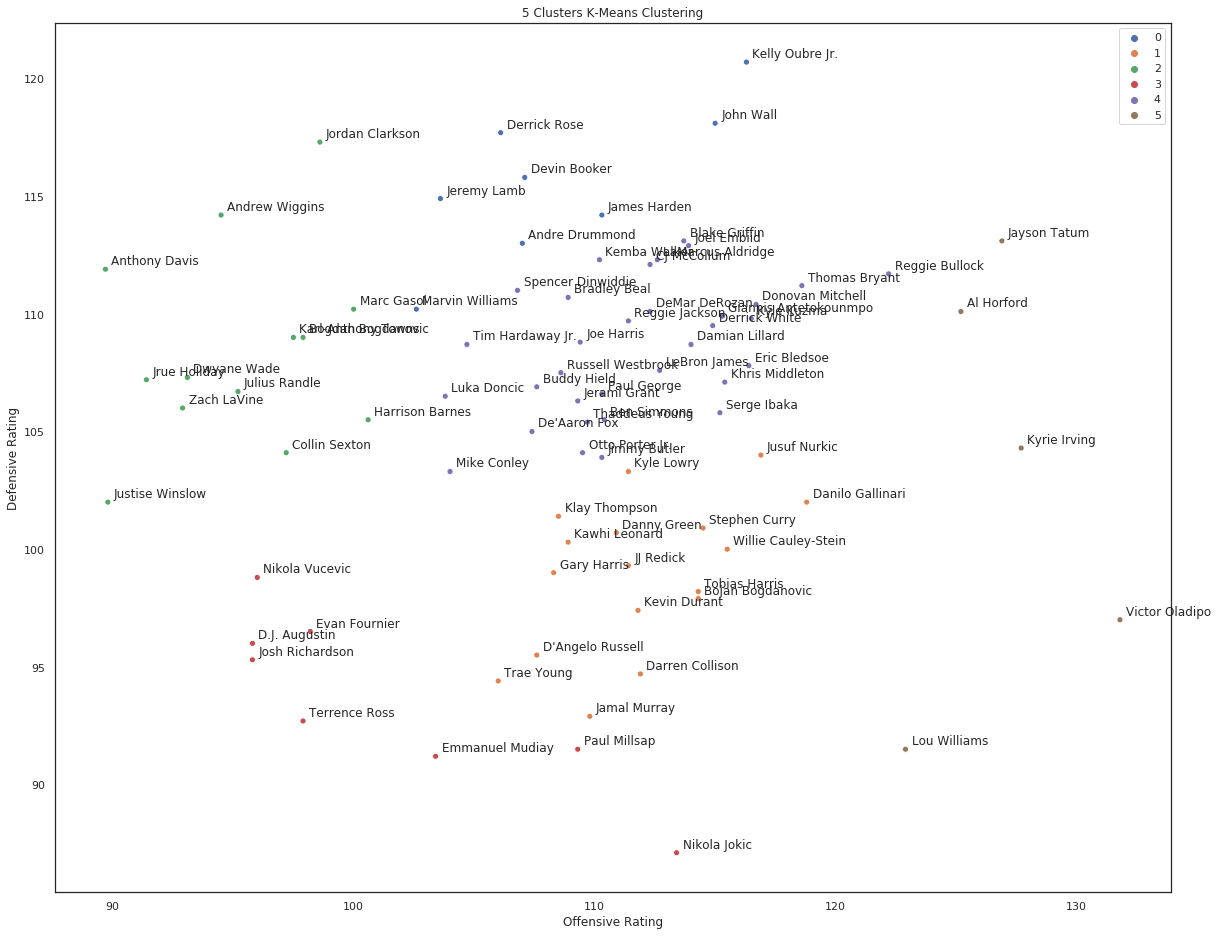

In [37]:
#dictionary for x,y name of players and labels
d = {'names': clutch_all.index.values, 'ortg': clutch_all.ortg, 'drtg': clutch_all.drtg, 'labels': labels}
#turning into dataframe
df = pd.DataFrame(d)
#changing fig size
plt.figure(figsize = (20,16))
#setting color palettes
ax = sns.scatterplot(clutch_all.ortg, clutch_all.drtg, hue = labels, palette = current[0:6], legend = 'full')
for i, txt in enumerate(df.names):
    ax.annotate(txt, (df.ortg[i]+0.25, df.drtg[i]+0.2))
#labels
ax.set_xlabel('Offensive Rating')
ax.set_ylabel('Defensive Rating')
ax.set_title('5 Clusters K-Means Clustering')

    Note: Due to graphing limitations on notebook and the fact that jitter is not working in the seaborn scatter 
    plot function the plot looks much cluttered than it has to be.

So now we can try to establish what kind of clusterrs we have. In total we have 6 indentified clusters from our GMM. Now we can indentiy characteristics that set up each cluster with our own knowledge of the game. 

    0 = Players that are average offensively but terrible defensively
    1 = Players that are average offensively but great defensively
    2 = players that are terrible offensively and terrible defensively
    3 = Players that are terrible offensively but elite defensively
    4 = Middle of the pact players that score above averagely but aren't great defensively
    5 = Players that are elite offensively and average to elite defensively.

The biggest difference we saw between the two means of clustering was the addition of the 0th cluster which helped indentiy a new group of players that aren't just average at offense and defense but are significantly worse defensively. So in the end both models were comparable but the GMM model gave us a much deeper insight.

## Conclusion

In conclusion we found a variety of useful insights that we can use to get a deeper understanding of the game. For one we saw there there is a slight advantage playing at home vs playing on the road and that it is a statistically significant difference. We were also able to figure out that all players in the NBA do score differently at home vs on the road at a statistically significant level but when you subset the players to only all stars they score about the same. Next, we were able to analyze why players shoot poorly in the clutch and we found that instead of players doing poorly at freethrows they actually just didn't shoot well during the game. We also tried to compare the shooting styles of the two teams that made it into the NBA finals the Golden State Warriors and the Toronto Raptors. Just by looking at the shot types of each team we can guess that Warriors might shoot more jump shots and Raptors more layups and when we broke down the shot we did find that to be the case but the biggest difference we fould was how little the Raptors shoot from the midrange shooting virtually none where as Warriors shot a fair bit amount.

Lastly, we tried to looked at identify the different types of clutch players. In order to do so we used two distinct clustering algorithmns, K-Means and Gaussian Mixture Models. We started with k-means and saw that although we can make clusters quite easily there were many points that intersected each other and we couldn't let distance define the classification so we moved on to GMMs. In GMMs we used silhouette scores to find the approriate number of clusters. With this we got 6 distinct clusters that we could use to categorize a player.

## Furthur Analysis

One way to take this analysis a step furthur is finding a way to incorporate the wide variety of data each dataframe contains. For example, the clutch stats dataframe has over 70+ columns but there is a high degree of colinearity so we need to come up with a solution for such a case. One thing we can do is use things such as Lasso Regression to find relevant and useful predictors for model building. Additionally, we can use things such as PCA/LCA reduce the dataframe and find a much more accurate representation of players.